<a href="https://colab.research.google.com/github/jiananwu72/LuFeO3Detect/blob/main/LuFeO3/LFODemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q pyNSID sidpy SciFiReaders nanonispy gwyfile pyTEMlib wget ipympl importlib wget
!pip install numpy==1.26.4

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.9/599.9 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 269.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pylab as plt
import sys

if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()
    from google.colab import drive

import sys
sys.path.insert(0, '../../')
sys.path.insert(0, '../../../sidpy')
import sidpy

%load_ext autoreload
%autoreload 2

import pyTEMlib
import pyTEMlib.file_tools      # File input/ output library
import pyTEMlib.image_tools

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
Symmetry functions of spglib enabled
Qt dialogs are not available
SimpleITK not installed; Registration Functions for Image Stacks not available
install with: conda install -c simpleitk simpleitk 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


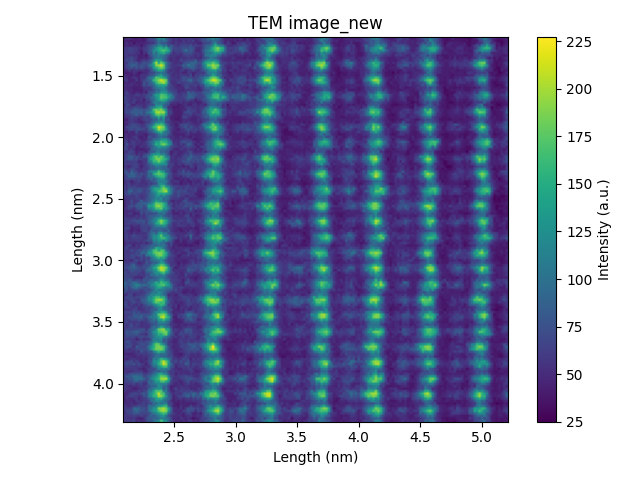

In [25]:
from PIL import Image
from scipy.ndimage import zoom
import matplotlib.pyplot as plt

# Change for each pictures
zooming_factor = 0.5
img_path = '/content/drive/MyDrive/Data/LFO/Picture2.png'
img = Image.open(img_path).convert('L')
image = np.array(img).astype(np.float32)
image = zoom(image, zooming_factor, order=3)

dataset = sidpy.Dataset.from_array(image)
dataset.quantity = 'Intensity'
dataset.title = 'TEM image'
dataset.units = 'a.u.'
dataset.data_type = sidpy.DataType.IMAGE
dataset.modality = 'Experimental'
dataset.set_dimension(0, sidpy.Dimension(np.arange(dataset.shape[0])*.02,
                                          name='x', units='nm', quantity='Length',
                                          dimension_type='spatial'))
dataset.set_dimension(1, sidpy.Dimension(np.arange(dataset.shape[1])*.02,
                                          name='y', units='nm', quantity='Length',
                                          dimension_type='spatial'))
left = 105
right = 15
top = 60
bottom = 60
dataset = dataset[left:-right, bottom:-top]
dataset.plot();

In [26]:
dataset

sidpy.Dataset of type IMAGE with:
 dask.array<getitem, shape=(156, 156), dtype=float32, chunksize=(156, 156), chunktype=numpy.ndarray>
 data contains: Intensity (a.u.)
 and Dimensions: 
x:  Length (nm) of size (156,)
y:  Length (nm) of size (156,)

##Fourier Filtering: Not Needed


fft :
	smoothing : 1
	minimum_intensity : 6.417699173411594
	maximum_intensity : 12.054283093371888
source:  TEM image_new


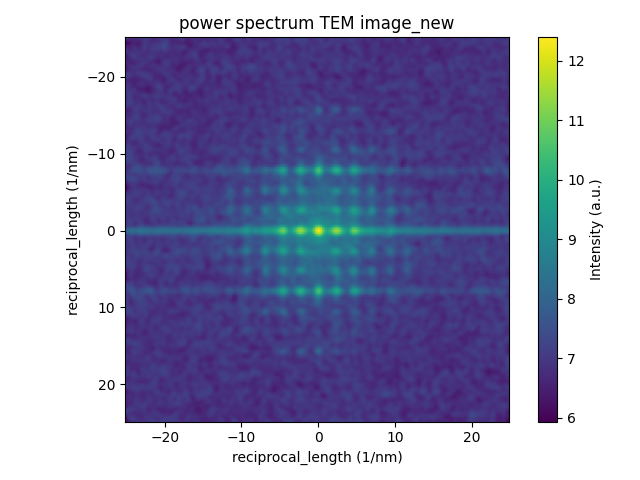

In [ ]:
# image = dataset
# power_spectrum = pyTEMlib.image_tools.power_spectrum(image, smoothing=1)
# power_spectrum.view_metadata()
# print('source: ', power_spectrum.source)
# view = power_spectrum.plot()

Found 116 reflections


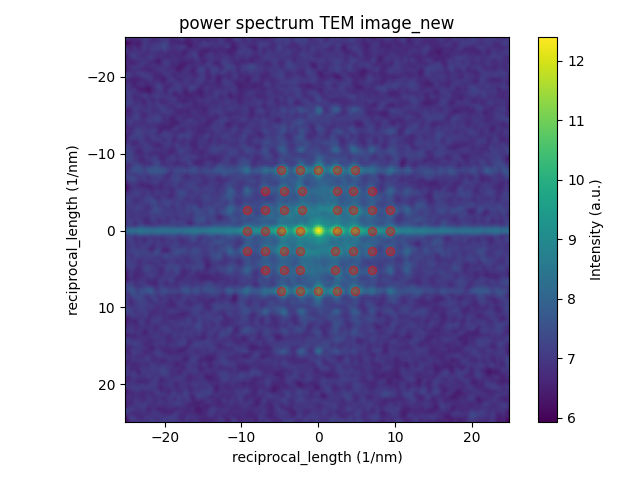

In [ ]:
# # ------Input----------
# spot_threshold=0.05
# # ---------------------

# spots = []
# spots, _ = pyTEMlib.image_tools.diffractogram_spots(power_spectrum, spot_threshold=spot_threshold)
# spots = spots[np.linalg.norm(spots[:,:2],axis=1)<10,:]
# spots = spots[np.linalg.norm(spots[:,:2],axis=1)>0.5,:]
# power_spectrum.plot()

# plt.gca().scatter(spots[:,0],spots[:,1], color='red', alpha=0.4);

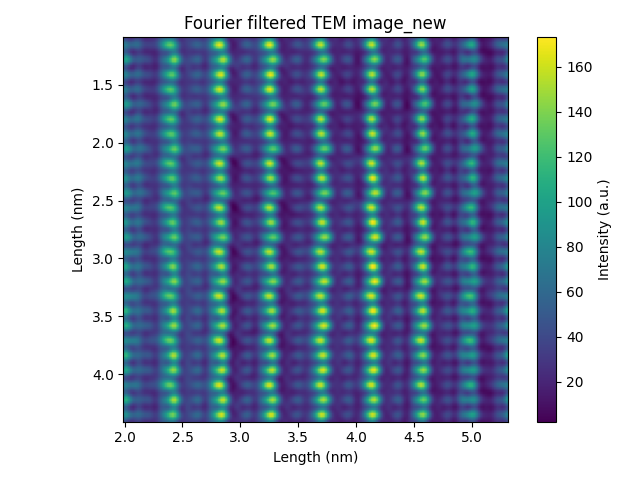

In [ ]:
# filtered_dataset = pyTEMlib.image_tools.adaptive_fourier_filter(image, spots,
#                                                                 low_pass=1.0, reflection_radius=0.5)
# view = filtered_dataset.plot()

fft :
	smoothing : 1
	minimum_intensity : 6.417699173411594
	maximum_intensity : 12.054283093371888
source:  TEM image_new


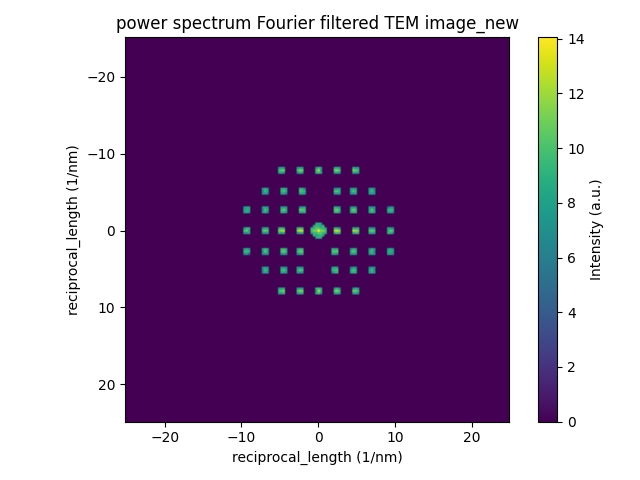

In [ ]:
# filtered_power_spectrum = pyTEMlib.image_tools.power_spectrum(filtered_dataset, smoothing=0)

# power_spectrum.view_metadata()
# print('source: ', power_spectrum.source)
# view = filtered_power_spectrum.plot()

##LR Deconvolution: Not Needed


2.5
smal
3 0.06
Deconvolution of  TEM image_new


  0%|          | 0/500 [00:00<?, ?it/s]

terminate
converged in 501 iterations

 Lucy-Richardson deconvolution converged in 501  iterations


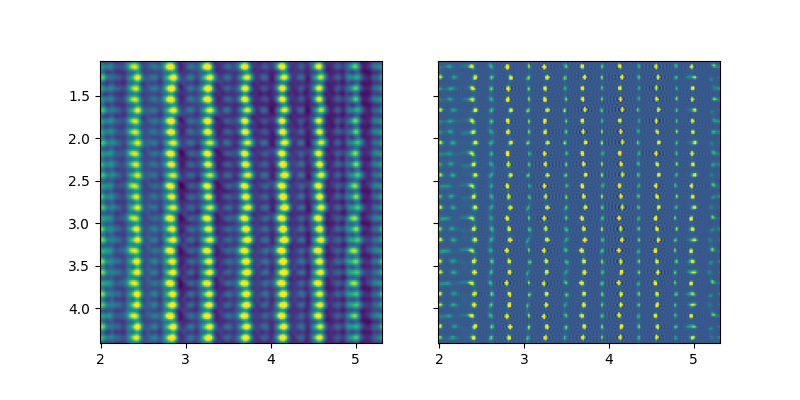

In [ ]:
# import pyTEMlib.probe_tools

# # ------- Input ------
# atoms_size = .05 # in nm
# # --------------------
# # image = dataset.sum(axis=0)
# image = filtered_dataset

# out_tags = {}
# image.metadata['experiment']= {'convergence_angle': 30, 'acceleration_voltage': 200000.}

# scale_x =image.x.slope
# gauss_diameter = atoms_size/scale_x
# print(gauss_diameter)
# if gauss_diameter < 3:
#     print('smal')
#     gauss_diameter = 3
# print(gauss_diameter, gauss_diameter*scale_x)
# gauss_probe = pyTEMlib.probe_tools.make_gauss(image.shape[0], image.shape[1], gauss_diameter)

# print('Deconvolution of ', dataset.title)
# LR_dataset = pyTEMlib.image_tools.decon_lr(image, gauss_probe, verbose=False)

# extent = LR_dataset.get_extent([0,1])
# fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
# ax[0].imshow(image.T, extent = extent,vmax=np.median(np.array(image))+3*np.std(np.array(image)))
# ax[1].imshow(LR_dataset.T, extent = extent, vmax=np.median(np.array(LR_dataset))+3*np.std(np.array(LR_dataset)));

In [ ]:
LR_dataset.metadata.update({'analysis': {'Lucy_Richardson': {
                        'notebook': 'Image_Registration' ,
                        # 'notebook_version': __notebook_version__,
                        'input': dataset.title,
                        'probe_diameter': gauss_diameter,
                        'kind_of_probe': 'Gauss',
                        'probe_width': atoms_size
                        }}})

##Atom Finding


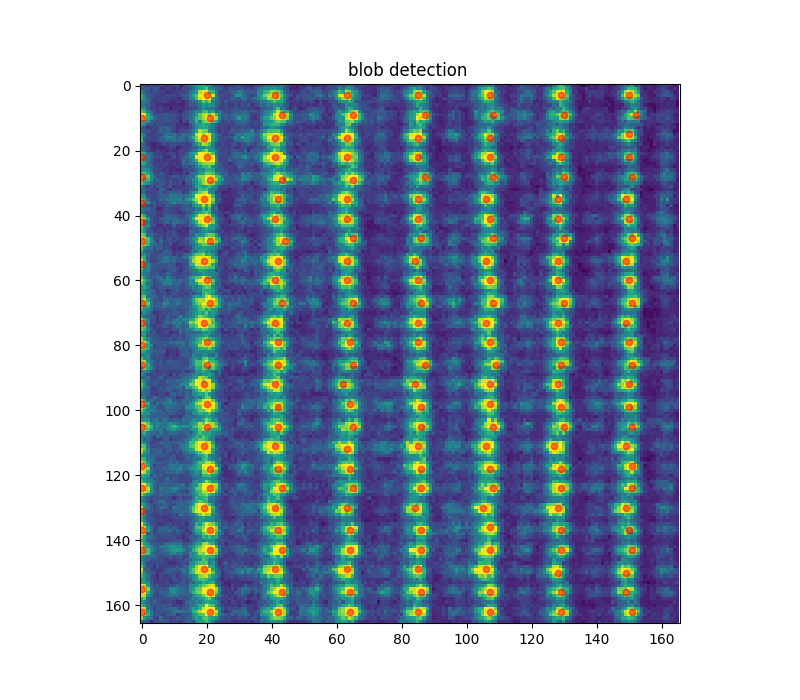

In [14]:
import skimage
# ------- Input ------
threshold = 30 #usally between 0.01 and 0.9  the smaller the more atoms
atom_size = .1 #in nm
min_atom_size = .04 #in nm
# ----------------------

image = dataset
image = image
#image = image_choice.dataset
# scale_x = pyTEMlib.file_tools.get_slope(image.dim_1)
scale_x =image.x.slope
blobs =  skimage.feature.blob_log(image, min_sigma = min_atom_size/scale_x, max_sigma=atom_size/scale_x, threshold=threshold)

fig1, ax = plt.subplots(1, 1,figsize=(8,7), sharex=True, sharey=True)
plt.title("blob detection ")

plt.imshow(image.T, interpolation='nearest', vmax=np.median(np.array(image))+3*np.std(np.array(image)))
plt.scatter(blobs[:, 0], blobs[:, 1], c='r', s=20, alpha = .5);

In [19]:
out_tags  =  {}
out_tags['analysis']= 'Atom Positions'
# out_tags['notebook']= __notebook__
# out_tags['notebook_version']= __notebook_version__

out_tags['atoms'] = blobs
out_tags['atom_size'] = atom_size #in nm gives the size of the atoms or resolution
out_tags['threshold'] =  threshold  #between 0.01 and 0.1
out_tags['pixel_size'] = scale_x


out_tags['name'] = 'Atom finding'
out_tags['title'] = out_tags['name']
tags = {'atom_pixel':  out_tags}
# if isinstance(image.metadata['analysis'], str):
#     image.metadata['analysis']={image.metadata['analysis']:{}}

# image.metadata['analysis'].update(tags)

sidpy.Dataset of type IMAGE with:
 dask.array<sub, shape=(166, 166), dtype=float32, chunksize=(166, 166), chunktype=numpy.ndarray>
 data contains: Intensity (a.u.)
 and Dimensions: 
x:  Length (nm) of size (166,)
y:  Length (nm) of size (166,)
using radius  3 pixels


  0%|          | 0/202 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pyTEMlib/probe_tools.py:17: RuntimeWarning: invalid value encountered in divide
  probe = g / g.sum() * intensity


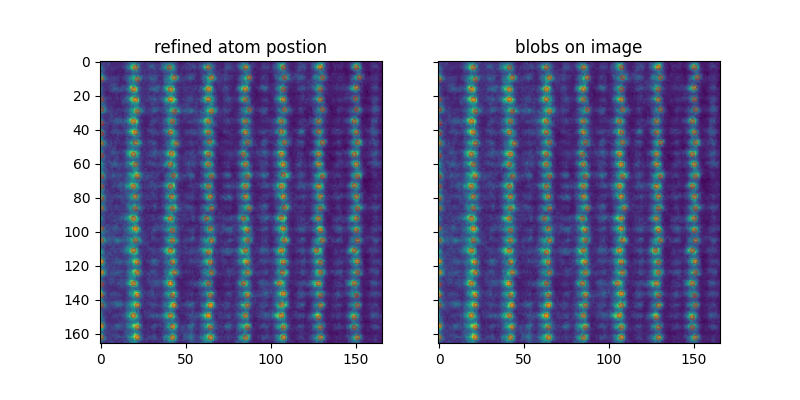

In [16]:
import pyTEMlib.atom_tools
atom_radius = 3
#atoms = atom_group['atoms'][()]
atoms = blobs
image = image-image.min()
print(image)

#atom_radius = 2
MaxInt = 0
MinInt = 0
maxDist = 2
sym = pyTEMlib.atom_tools.atom_refine(np.array(image), atoms, atom_radius, max_int = 0, min_int = 0, max_dist = 2)
refined_atoms = np.array(sym['atoms'])

fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax[0].imshow(image.T)
ax[0].scatter(refined_atoms[:,0],refined_atoms[:,1],  s=10, alpha = 0.3, color = 'red')
ax[0].set_title('refined atom postion')
ax[1].imshow(image.T)
ax[1].scatter(atoms[:, 0], atoms[:, 1], c='r', s=10, alpha = .3);
ax[1].set_title('blobs on image');

##Position Analyzing With Breadth First Search: Not Needed


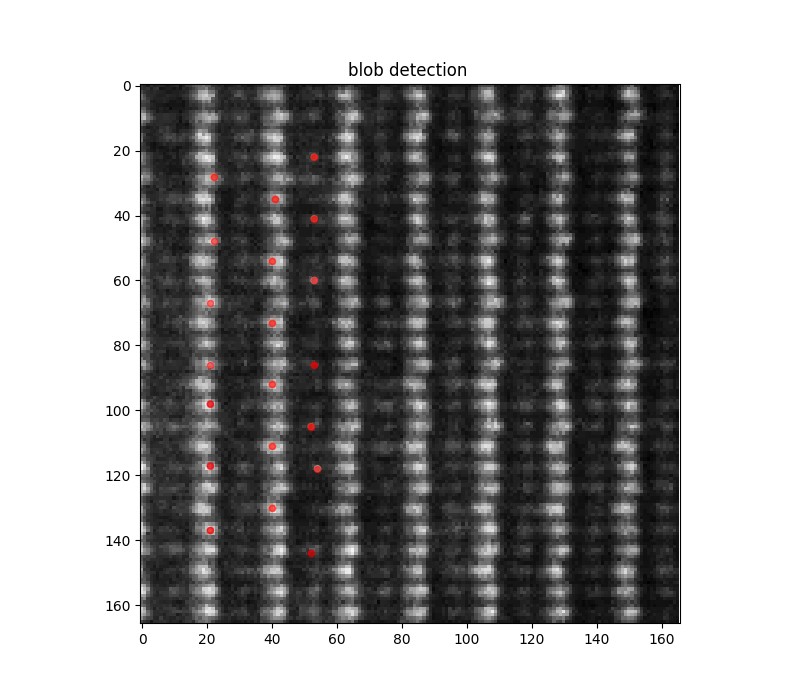

In [ ]:
import scipy
import pyTEMlib.graph_tools
def breath_first(graph, initial, lattice_parameter, tolerance=1):

    neighbour_tree = scipy.spatial.KDTree(graph)
    distances, indices = neighbour_tree.query(graph,  # let's get all neighbours
                                              k=50)  # projection_tags['number_of_nearest_neighbours']*2 + 1)
    visited = []  # the atoms we visited
    angles = []  # atoms at ideal lattice
    sub_lattice = []
    sub_lattice = []  # atoms in base and disregarded
    queue = [initial]
    queue_angles=[0]

    while queue:
        node = queue.pop(0)
        angle = queue_angles.pop(0)

        if node not in visited and node not in sub_lattice:
            visited.append(node)
            angles.append(angle)
            neighbors = indices[node]
            for i, neighbour in enumerate(neighbors):
                if neighbour not in visited:
                    hopp = graph[node] - graph[neighbour]
                    distance_to_ideal = np.linalg.norm(hopp)
                    if distance_to_ideal < lattice_parameter - tolerance*5:
                        sub_lattice.append(neighbour)
                    elif np.min(np.abs(distance_to_ideal- lattice_parameter)) < tolerance:
                        queue.append(neighbour)
                        queue_angles.append(np.arctan2(hopp[1], hopp[0]))
    angles[0] = angles[1]
    out_atoms = np.stack([graph[visited][:, 0], graph[visited][:, 1], angles])
    return out_atoms.T, visited

def delete_rim_atoms(atoms, extent, rim_distance):
    rim = np.where(atoms[:, :2] - extent > -rim_distance)[0]
    middle_atoms = np.delete(atoms, rim, axis=0)
    rim = np.where(middle_atoms[:, :2].min(axis=1)<rim_distance)[0]
    middle_atoms = np.delete(middle_atoms, rim, axis=0)
    return middle_atoms
init = 10
dist = 19.5
hopped_atoms, indices = breath_first(blobs, init, dist, 1.5)
middle_atoms = pyTEMlib.graph_tools.delete_rim_atoms(hopped_atoms, image.shape, 20)

plt.close('all')
fig1, ax = plt.subplots(1, 1,figsize=(8,7), sharex=True, sharey=True)
plt.title("blob detection ")

# plt.imshow(dataset.T, interpolation='nearest',cmap='gray', vmax=np.median(np.array(image))+3*np.std(np.array(image)))
plt.imshow(dataset.T,cmap='gray')
plt.scatter(middle_atoms[:, 0], middle_atoms[:, 1], c=np.degrees(np.degrees(middle_atoms[:, 2])% 60), cmap = 'Reds', s=20, alpha = .5);
plt.scatter(middle_atoms[:, 0], middle_atoms[:, 1], c='red', s=20, alpha = .5);
#plt.scatter(blobs[init][0], blobs[init][1], c='orange')
angles = np.degrees(middle_atoms[:, 2])% 60

## Windowing

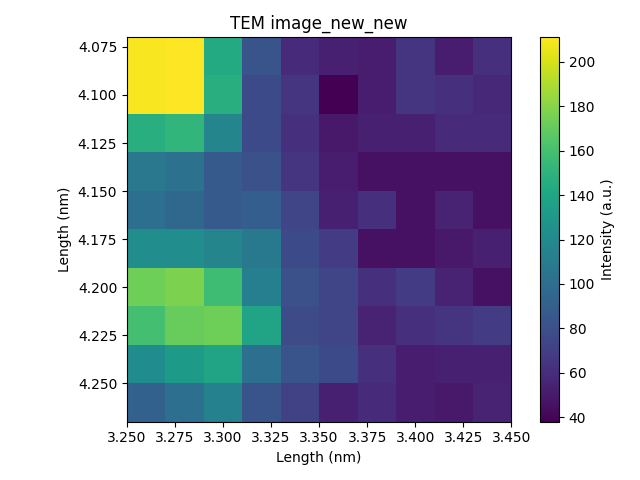

In [39]:
image = dataset
x = int(refined_atoms[4][0])
y = int(refined_atoms[4][1])
radius = 5
window = image[x - radius:x + radius, y - radius:y + radius]
window.plot();

In [30]:
refined_atoms.shape
windows = []
for i in range(refined_atoms.shape[0]):
    if refind_atoms.

(202, 2)

In [ ]:
dataset = dataset[left:-right, bottom:-top]